Task

Output from : https://jgcri.shinyapps.io/HectorUI/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [153]:
RCP26=pd.read_csv('Hector-data-RCP26.csv',skiprows=3)
RCP45=pd.read_csv('Hector-data-RCP45.csv',skiprows=3)
RCP60=pd.read_csv('Hector-data-RCP60.csv',skiprows=3)
RCP85=pd.read_csv('Hector-data-RCP85.csv',skiprows=3)

In [154]:
RCP26.head()

,scenario,year,variable,value,units
0,RCP Standard-RCP-2.6,1800,Tgav,0.117697,degC
1,RCP Standard-RCP-2.6,1801,Tgav,0.121249,degC
2,RCP Standard-RCP-2.6,1802,Tgav,0.124389,degC
3,RCP Standard-RCP-2.6,1803,Tgav,0.127234,degC
4,RCP Standard-RCP-2.6,1804,Tgav,0.129859,degC


In [155]:
RCP45.head()

,scenario,year,variable,value,units
0,RCP Standard-RCP-4.5,1800,Tgav,0.117697,degC
1,RCP Standard-RCP-4.5,1801,Tgav,0.121249,degC
2,RCP Standard-RCP-4.5,1802,Tgav,0.124389,degC
3,RCP Standard-RCP-4.5,1803,Tgav,0.127234,degC
4,RCP Standard-RCP-4.5,1804,Tgav,0.129859,degC


In [156]:
RCP26.variable.unique(), RCP26.units.unique()

(array(['Tgav', 'ffi_emissions', 'heatflux'], dtype=object),
 array(['degC', 'Pg C/yr', 'W/m2'], dtype=object))

In [140]:
cumRCP26[300]

642.457258985

In [149]:
# calc cumulative emissions
cumRCP26=np.zeros(len(RCP26[RCP26.variable=='ffi_emissions']))
cumRCP45=np.zeros(len(RCP45[RCP45.variable=='ffi_emissions']))
cumRCP60=np.zeros(len(RCP60[RCP60.variable=='ffi_emissions']))
cumRCP85=np.zeros(len(RCP85[RCP85.variable=='ffi_emissions']))

for i in range(len(RCP26[RCP26.variable=='ffi_emissions'])):
    if i ==0:
        cumRCP26[i]=RCP26[RCP26.variable=='ffi_emissions'].value.iloc[i]
        cumRCP45[i]=RCP26[RCP45.variable=='ffi_emissions'].value.iloc[i]
        cumRCP60[i]=RCP26[RCP60.variable=='ffi_emissions'].value.iloc[i]
        cumRCP85[i]=RCP26[RCP85.variable=='ffi_emissions'].value.iloc[i]
    else:
        cumRCP26[i]=RCP26[RCP26.variable=='ffi_emissions'].value.iloc[:i].sum()
        cumRCP45[i]=RCP45[RCP45.variable=='ffi_emissions'].value.iloc[:i].sum()
        cumRCP60[i]=RCP60[RCP60.variable=='ffi_emissions'].value.iloc[:i].sum()
        cumRCP85[i]=RCP85[RCP85.variable=='ffi_emissions'].value.iloc[:i].sum()

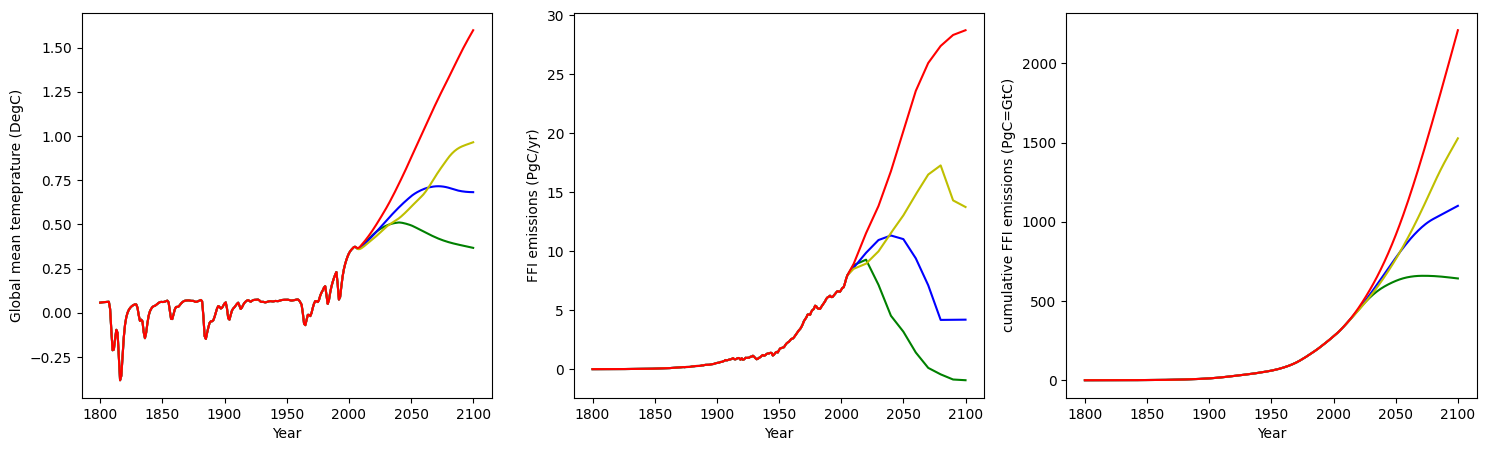

In [150]:
plt.figure(figsize=(18, 5))
plt.subplot(131)
plt.plot(RCP26[RCP26.variable=='Tgav'].year,RCP26[RCP26.variable=='Tgav']['value'],'g')
plt.plot(RCP45[RCP45.variable=='Tgav'].year,RCP45[RCP45.variable=='Tgav']['value'],'b')
plt.plot(RCP60[RCP60.variable=='Tgav'].year,RCP60[RCP60.variable=='Tgav']['value'],'y')
plt.plot(RCP85[RCP85.variable=='Tgav'].year,RCP85[RCP85.variable=='Tgav']['value'],'r')
plt.ylabel('Global mean temeprature (DegC)')
plt.xlabel('Year');
plt.subplot(132)
plt.plot(RCP26[RCP26.variable=='ffi_emissions'].year,RCP26[RCP26.variable=='ffi_emissions']['value'],'g')
plt.plot(RCP45[RCP45.variable=='ffi_emissions'].year,RCP45[RCP45.variable=='ffi_emissions']['value'],'b')
plt.plot(RCP60[RCP60.variable=='ffi_emissions'].year,RCP60[RCP60.variable=='ffi_emissions']['value'],'y')
plt.plot(RCP85[RCP85.variable=='ffi_emissions'].year,RCP85[RCP85.variable=='ffi_emissions']['value'],'r')
plt.ylabel('FFI emissions (PgC/yr)')
plt.xlabel('Year');

plt.subplot(133)
plt.plot(RCP26[RCP26.variable=='ffi_emissions'].year,cumRCP26,'g')
plt.plot(RCP45[RCP45.variable=='ffi_emissions'].year,cumRCP45,'b')
plt.plot(RCP60[RCP60.variable=='ffi_emissions'].year,cumRCP60,'y')
plt.plot(RCP85[RCP85.variable=='ffi_emissions'].year,cumRCP85,'r')
plt.ylabel('cumulative FFI emissions (PgC=GtC)')
plt.xlabel('Year');

In [151]:
#calc TCRE in degC/GtC
TCRE=(np.mean(RCP26[RCP26.variable=='Tgav'].value/cumRCP26)+
      np.mean(RCP45[RCP45.variable=='Tgav'].value/cumRCP45)+
      np.mean(RCP60[RCP60.variable=='Tgav'].value/cumRCP60)+
      np.mean(RCP85[RCP85.variable=='Tgav'].value/cumRCP85))/4
TCRE

0.03343684652472806

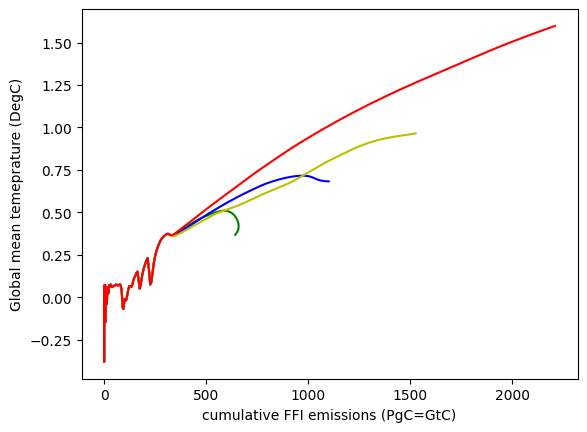

In [109]:
plt.plot(cumRCP26,RCP26[RCP26.variable=='Tgav'].value,'g')
plt.plot(cumRCP45,RCP45[RCP45.variable=='Tgav'].value,'b')
plt.plot(cumRCP60,RCP60[RCP60.variable=='Tgav'].value,'y')
plt.plot(cumRCP85,RCP85[RCP85.variable=='Tgav'].value,'r')
plt.ylabel('Global mean temeprature (DegC)')
plt.xlabel('cumulative FFI emissions (PgC=GtC)');

In [ ]:
df=pd.read_csv('Hector-data-RCP26.csv',skiprows=3)

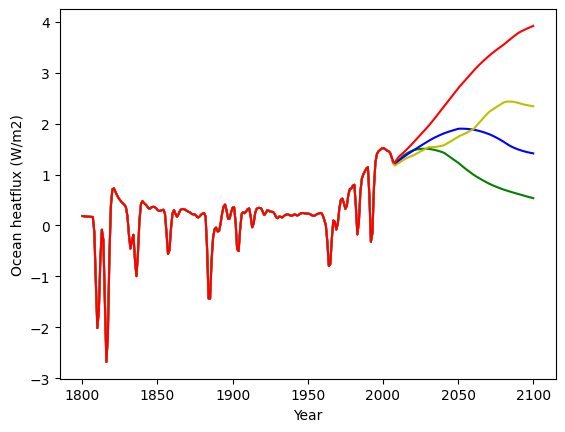

In [160]:

plt.plot(RCP26[RCP26.variable=='heatflux'].year,RCP26[RCP26.variable=='heatflux']['value'],'g')
plt.plot(RCP45[RCP45.variable=='heatflux'].year,RCP45[RCP45.variable=='heatflux']['value'],'b')
plt.plot(RCP60[RCP60.variable=='heatflux'].year,RCP60[RCP60.variable=='heatflux']['value'],'y')
plt.plot(RCP85[RCP85.variable=='heatflux'].year,RCP85[RCP85.variable=='heatflux']['value'],'r')
plt.ylabel('Ocean heatflux (W/m2)')
plt.xlabel('Year');

In [161]:
RCP26[RCP26.variable=='ffi_emissions']['value'].iloc[250:300]

551    3.18560
552    3.00896
553    2.83232
554    2.65568
555    2.47904
556    2.30240
557    2.12576
558    1.94912
559    1.77248
560    1.59584
561    1.41920
562    1.28885
563    1.15850
564    1.02815
565    0.89780
566    0.76745
567    0.63710
568    0.50675
569    0.37640
570    0.24605
571    0.11570
572    0.06083
573    0.00596
574   -0.04891
575   -0.10378
576   -0.15865
577   -0.21352
578   -0.26839
579   -0.32326
580   -0.37813
581   -0.43300
582   -0.47674
583   -0.52048
584   -0.56422
585   -0.60796
586   -0.65170
587   -0.69544
588   -0.73918
589   -0.78292
590   -0.82666
591   -0.87040
592   -0.87644
593   -0.88248
594   -0.88852
595   -0.89456
596   -0.90060
597   -0.90664
598   -0.91268
599   -0.91872
600   -0.92476
Name: value, dtype: float64